## Import Statements / Load Data

In [2]:
import pandas as pd
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.collocations import *
import string
from textblob import TextBlob
from nltk import tokenize
from nltk.corpus import stopwords, gutenberg
from wordcloud import WordCloud
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import seaborn as sns

#nltk.download("stopwords")

In [3]:
df = pd.read_csv('jamaican_news.csv')
df.head()

,Company,Date,Link,Title,Text
0,Sagicor,01/28,https://jamaica.loopnews.com/content/registrat...,Registration closes February 1 for Sagicor Sig...,Registration for the Sagicor Sigma 25th Legacy...
1,Sagicor,01/26,https://jamaica.loopnews.com/content/sagicor-f...,Sagicor Financial announces retirement of Dodr...,Sagicor Financial Company has announced that D...
2,Sagicor,12/14/2022,https://jamaica.loopnews.com/content/former-sa...,Former Sagicor VP slapped with fraud-related c...,Former vice president of group marketing at Sa...
3,Sagicor,NaN,https://jamaica.loopnews.com/content/sagicor-l...,Sagicor launches Community Heroes Awards,Nominations for the Sagicor Foundation biennia...
4,Sagicor,09/18/2022,https://jamaica.loopnews.com/content/sagicor-r...,Sagicor reorganises senior management structure,Sagicor Group Jamaica has announced changes to...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  23 non-null     object
 1   Date     22 non-null     object
 2   Link     23 non-null     object
 3   Title    23 non-null     object
 4   Text     23 non-null     object
dtypes: object(5)
memory usage: 1.0+ KB


## Clean Data

In [5]:
print(df['Link'][0]) # date is 2023
print(df['Link'][1]) # page not found - one 'r' in miller and also 2023
print(df['Link'][3])

df['Link'][1] = 'https://jamaica.loopnews.com/content/sagicor-financial-announces-retirement-dodridge-miller'
df['Date'][1] = '01/26/2023'
df['Date'][0] = '01/28/2023'
df['Date'][3] = '09/26/2022'

https://jamaica.loopnews.com/content/registration-closes-february-1-sagicor-sigma-25th-legacy-run
https://jamaica.loopnews.com/content/sagicor-financial-announces-retirement-dodridge-millerr
https://jamaica.loopnews.com/content/sagicor-launches-community-heroes-awards


In [6]:
df.head()

,Company,Date,Link,Title,Text
0,Sagicor,01/28/2023,https://jamaica.loopnews.com/content/registrat...,Registration closes February 1 for Sagicor Sig...,Registration for the Sagicor Sigma 25th Legacy...
1,Sagicor,01/26/2023,https://jamaica.loopnews.com/content/sagicor-f...,Sagicor Financial announces retirement of Dodr...,Sagicor Financial Company has announced that D...
2,Sagicor,12/14/2022,https://jamaica.loopnews.com/content/former-sa...,Former Sagicor VP slapped with fraud-related c...,Former vice president of group marketing at Sa...
3,Sagicor,09/26/2022,https://jamaica.loopnews.com/content/sagicor-l...,Sagicor launches Community Heroes Awards,Nominations for the Sagicor Foundation biennia...
4,Sagicor,09/18/2022,https://jamaica.loopnews.com/content/sagicor-r...,Sagicor reorganises senior management structure,Sagicor Group Jamaica has announced changes to...


In [7]:
set(df.Company)

{'Barita', 'GraceKennedy', 'Sagicor'}

In [8]:
set(df.Date) #looks good

{'01/05/2022',
 '01/22/2023',
 '01/26/2023',
 '01/28/2023',
 '02/16/2021',
 '03/02/2022',
 '03/24/2022',
 '05/11/2022',
 '05/20/2022',
 '07/08/2022',
 '08/16/2022',
 '09/06/2022',
 '09/18/2022',
 '09/25/2020',
 '09/26/2022',
 '09/27/2022',
 '10/08/2021',
 '11/04/2022',
 '11/11/2022',
 '11/28/2022',
 '12/02/2022',
 '12/14/2022',
 '12/25/2020'}

In [9]:
df.Text = [txt.lower().strip() for txt in df.Text]
df.Title = [txt.lower().strip() for txt in df.Title]
df.head()

,Company,Date,Link,Title,Text
0,Sagicor,01/28/2023,https://jamaica.loopnews.com/content/registrat...,registration closes february 1 for sagicor sig...,registration for the sagicor sigma 25th legacy...
1,Sagicor,01/26/2023,https://jamaica.loopnews.com/content/sagicor-f...,sagicor financial announces retirement of dodr...,sagicor financial company has announced that d...
2,Sagicor,12/14/2022,https://jamaica.loopnews.com/content/former-sa...,former sagicor vp slapped with fraud-related c...,former vice president of group marketing at sa...
3,Sagicor,09/26/2022,https://jamaica.loopnews.com/content/sagicor-l...,sagicor launches community heroes awards,nominations for the sagicor foundation biennia...
4,Sagicor,09/18/2022,https://jamaica.loopnews.com/content/sagicor-r...,sagicor reorganises senior management structure,sagicor group jamaica has announced changes to...


In [10]:
df.Date = [pd.to_datetime(day) for day in df.Date]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Company  23 non-null     object        
 1   Date     23 non-null     datetime64[ns]
 2   Link     23 non-null     object        
 3   Title    23 non-null     object        
 4   Text     23 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.0+ KB


## Sentiment Analysis

0.07731921812014703
0.08420217209690894
0.058677669704949094


1.1

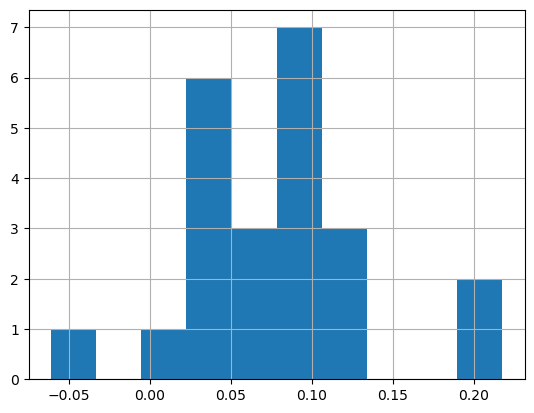

In [11]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Text'].apply(get_polarity)

df['Polarity'].hist()
print(df['Polarity'].mean())
print(df['Polarity'].median()) 
print(df['Polarity'].std())

0.8+0.3

In [12]:
df['Sentiment_Type'] = ''
df.loc[df.Polarity>0.09,'Sentiment_Type'] = 'POSITIVE'
df.loc[(df.Polarity>=0.05) & (df.Polarity<=0.09), 'Sentiment_Type'] = 'NEUTRAL'
df.loc[df.Polarity<0.05,'Sentiment_Type'] = 'NEGATIVE'

<AxesSubplot: title={'center': 'Sentiment Analysis'}>

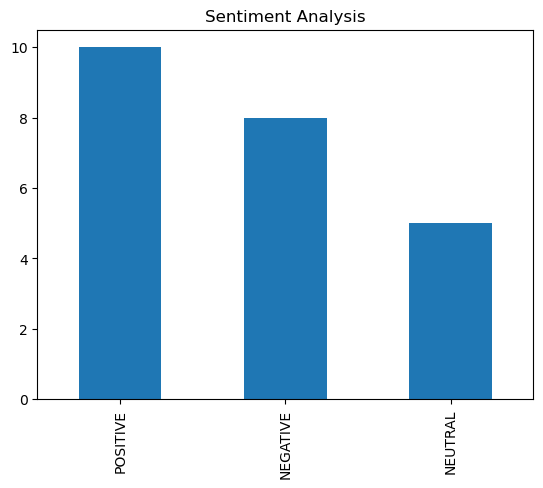

In [13]:
# Articles are overly positive - may be worth adjusting polarity level
# for categorization

df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [14]:
# inspecting negative article
df[df.Sentiment_Type=='NEGATIVE']

,Company,Date,Link,Title,Text,Polarity,Sentiment_Type
7,GraceKennedy,2022-12-02,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy goes solar,the new hi-lo food stores (hi-lo) location in ...,0.041599,NEGATIVE
10,GraceKennedy,2022-11-04,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy partners with ding dong for finan...,gracekennedy financial group (gkfg) has launch...,0.035930,NEGATIVE
12,GraceKennedy,2022-03-24,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy foundation to offer digital schol...,gracekennedy financial group (gkfg) has launch...,0.035930,NEGATIVE
15,Barita,2023-01-22,https://jamaica.loopnews.com/content/barita-as...,barita assures clients security of their inves...,"leading investment and brokerage firm, barita ...",0.029663,NEGATIVE
16,Barita,2022-09-06,https://jamaica.loopnews.com/content/barita-co...,barita concludes massive land purchase in st ann,barita investments limited has inked a deal wi...,0.011593,NEGATIVE
20,Barita,2021-02-16,https://jamaica.loopnews.com/content/barita-de...,barita deploying its capital with ‘extreme cau...,following a successful additional public offer...,0.046406,NEGATIVE
21,Barita,2020-12-25,https://jamaica.loopnews.com/content/barita-al...,barita almost doubles market capitalisation,"barita investments limited (bil), which had a ...",-0.060897,NEGATIVE
22,Barita,2020-09-25,https://jamaica.loopnews.com/content/barita-sh...,barita shares rocket,investors traded shares in barita investments ...,0.029924,NEGATIVE


In [15]:
# tokenizing with regex tokenizer
basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

# Create new column with tokenized data
df["text_tokenized"] = df["Text"].apply(tokenizer.tokenize)

In [16]:
df

,Company,Date,Link,Title,Text,Polarity,Sentiment_Type,text_tokenized
0,Sagicor,2023-01-28,https://jamaica.loopnews.com/content/registrat...,registration closes february 1 for sagicor sig...,registration for the sagicor sigma 25th legacy...,0.057283,NEUTRAL,"[registration, for, the, sagicor, sigma, 25th,..."
1,Sagicor,2023-01-26,https://jamaica.loopnews.com/content/sagicor-f...,sagicor financial announces retirement of dodr...,sagicor financial company has announced that d...,0.217361,POSITIVE,"[sagicor, financial, company, has, announced, ..."
2,Sagicor,2022-12-14,https://jamaica.loopnews.com/content/former-sa...,former sagicor vp slapped with fraud-related c...,former vice president of group marketing at sa...,0.098864,POSITIVE,"[former, vice, president, of, group, marketing..."
3,Sagicor,2022-09-26,https://jamaica.loopnews.com/content/sagicor-l...,sagicor launches community heroes awards,nominations for the sagicor foundation biennia...,0.203968,POSITIVE,"[nominations, for, the, sagicor, foundation, b..."
4,Sagicor,2022-09-18,https://jamaica.loopnews.com/content/sagicor-r...,sagicor reorganises senior management structure,sagicor group jamaica has announced changes to...,0.117378,POSITIVE,"[sagicor, group, jamaica, has, announced, chan..."
5,Sagicor,2022-08-16,https://jamaica.loopnews.com/content/sagicor-n...,sagicor now holds client portfolio of alliance...,"sagicor group says its subsidiary, sagicor inv...",0.093899,POSITIVE,"[sagicor, group, says, its, subsidiary, sagico..."
6,Sagicor,2022-05-11,https://jamaica.loopnews.com/content/sagicors-...,sagicor's q1 earnings up 31%,large insurance provider sagicor group jamaica...,0.068849,NEUTRAL,"[large, insurance, provider, sagicor, group, j..."
7,GraceKennedy,2022-12-02,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy goes solar,the new hi-lo food stores (hi-lo) location in ...,0.041599,NEGATIVE,"[the, new, hi, lo, food, stores, hi, lo, locat..."
8,GraceKennedy,2022-11-28,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy surpasses $100b revenue target se...,the gracekennedy group has posted revenues of ...,0.084202,NEUTRAL,"[the, gracekennedy, group, has, posted, revenu..."
9,GraceKennedy,2022-11-11,https://jamaica.loopnews.com/content/gracekenn...,gracekennedy profit down by one-quarter,the profit at gracekennedy limited (gk) declin...,0.069236,NEUTRAL,"[the, profit, at, gracekennedy, limited, gk, d..."


In [17]:
# storing stopwords list and adding punctuation
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

# function to remove stopwords
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    return [word for word in token_list if word not in stopwords_list]

In [18]:
# applying remove stopwords function
df["text_without_stopwords"] = df["text_tokenized"].apply(remove_stopwords)

In [19]:
# generate word cloud for a company
def gen_wordcloud(company):
    
    wordcloud = WordCloud(max_words = 200, stopwords = None, collocations = False, 
                          width = 600, height = 400, background_color = 'white', 
                          colormap = 'plasma') 

    wordcloud.generate(",".join(df["text_without_stopwords"][df['Company']==company].explode())) 

    plt.figure(figsize = (7, 7), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Sagicor Word Cloud', fontsize=15)
    plt.savefig(f'images/{company}_wordcloud.png')

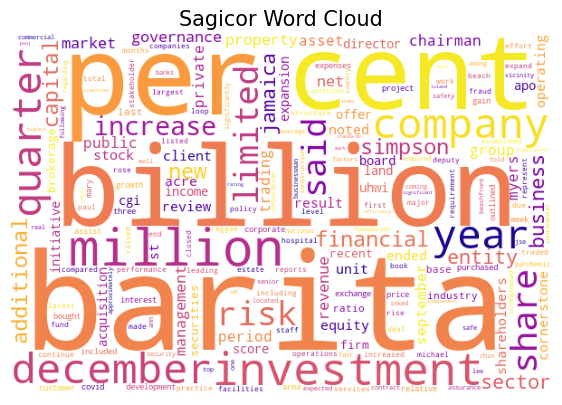

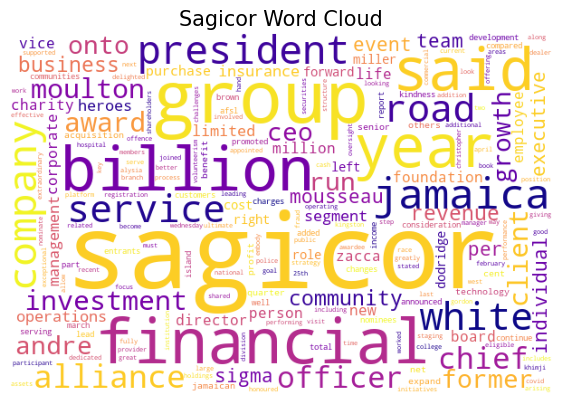

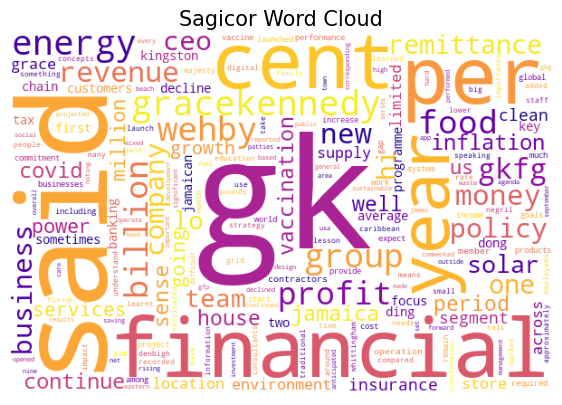

In [20]:
companies = list(set(df.Company))

for company in companies:
    gen_wordcloud(company)

In [21]:
def plot_sentiment(company):
    
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(figsize = (8, 5))
    sns.lineplot(data=df[df.Company==company], x="Date", y="Polarity")
    
    plt.title(f'{company} Sentiment', fontsize=15)
    plt.xticks(rotation=45)
    myFmt = mdates.DateFormatter('%b %Y') 
    ax.xaxis.set_major_formatter(myFmt)
    
    plt.savefig(f'images/{company}_sentiment_timeseries.png')

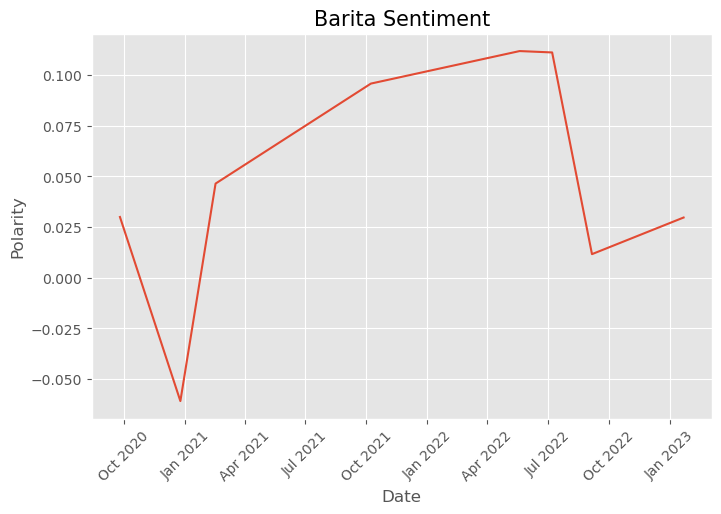

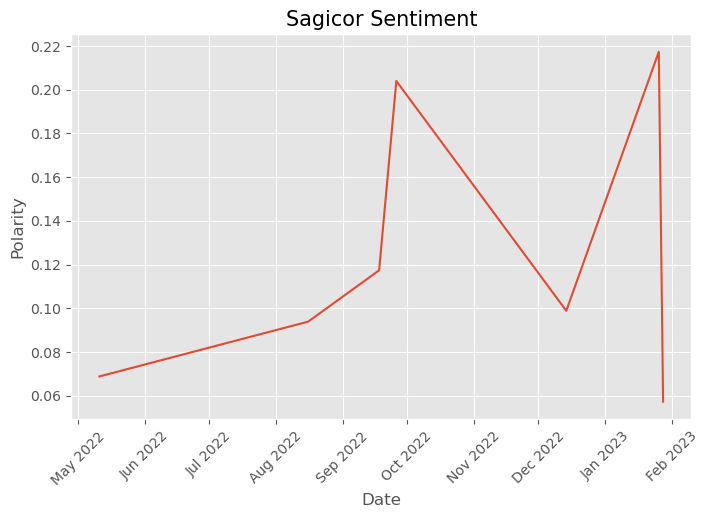

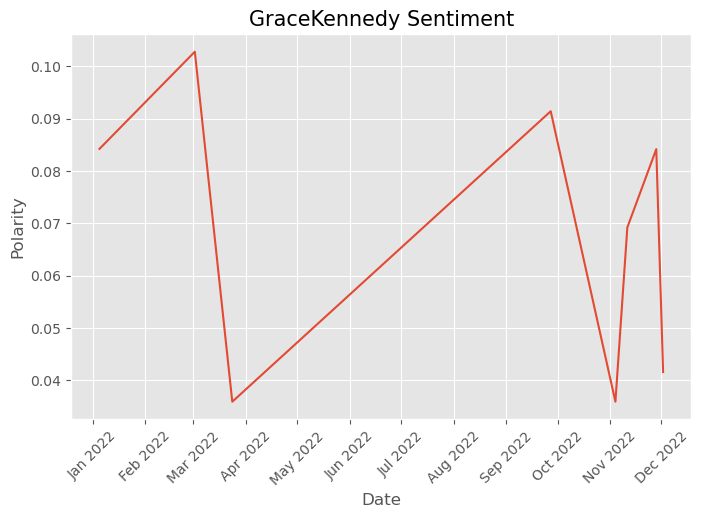

In [22]:
for company in companies:
    plot_sentiment(company)